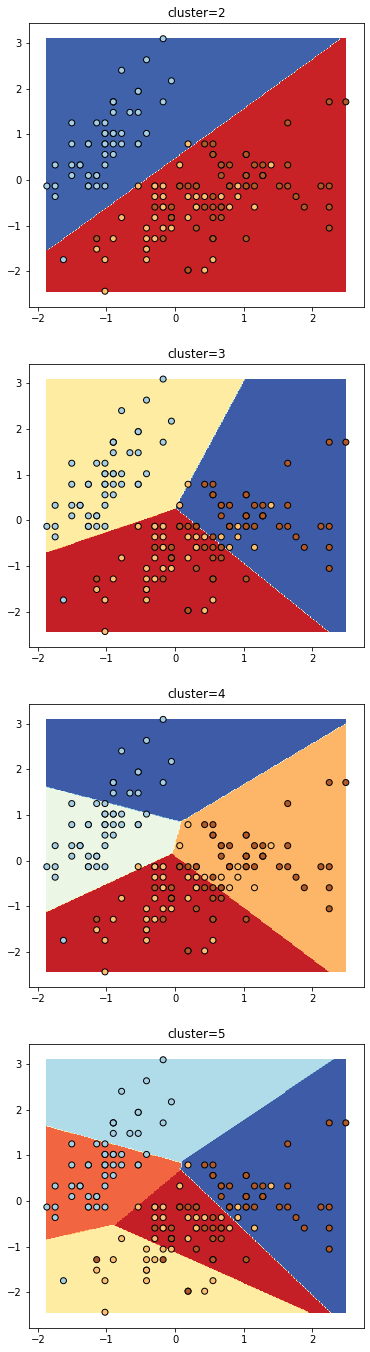

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import scale

pair = [0, 1]
plot_step = .02

iris = load_iris()

X_train = scale(iris.data[:, pair])
y_train = iris.target

x_min, x_max = np.min(X_train[:, 0]), np.max(X_train[:, 0])
y_min, y_max = np.min(X_train[:, 1]), np.max(X_train[:, 1])
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

plt.figure(figsize=(6, 6 * 4))
for i, n_cluster in enumerate(range(2, 6)):
    model = KMeans(n_clusters=n_cluster, random_state=9)
    model.fit(X_train)

    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    plt.subplot(4, 1, i + 1, title='cluster=%d' % n_cluster)
    plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

plt.show()